![png](../../../imagenes/logotipo-axity-ppt.png)

# Linear Discriminant Analysis (LDA)

## Explicación del Ejemplo

El propósito de este ejemplo es identificar a qué dígito corresponde una imagen. Se utilizará LDA, para reducir el número de características a utilizar.

### Los datos
Se utilizará el conjunto de datos load_digit de sklearn.  

El conjunto contiene imágenes de 8x8 pixeles, correspondientes a diferentes dígitos.  

In [1]:
# Importemos las librerias
import matplotlib.pyplot as plt

## Examinar los datos

In [2]:
# Importemos el conjunto de datos
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
digits.target[0]

0

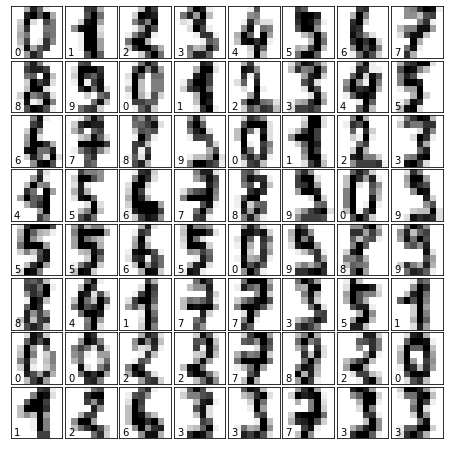

In [5]:
# Visualicemos los datos
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

## LDA

In [7]:
# Reducir la dimensión del dataset con LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
proj = lda.fit_transform(digits.data, digits.target)

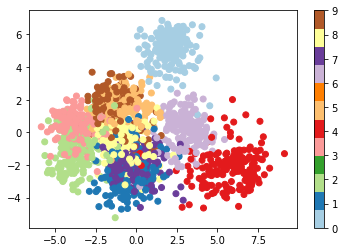

In [8]:
# Visualicemos una proyección de los 2 ejes principales
plt.figure()
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

## Entrenar el modelo

In [9]:
# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [10]:
# Ajustar el modelo de naive Bayes en el Conjunto de Entrenamiento
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
# Predicción de los resultados con el Conjunto de Prueba
predicted = clf.predict(X_test)
expected = y_test

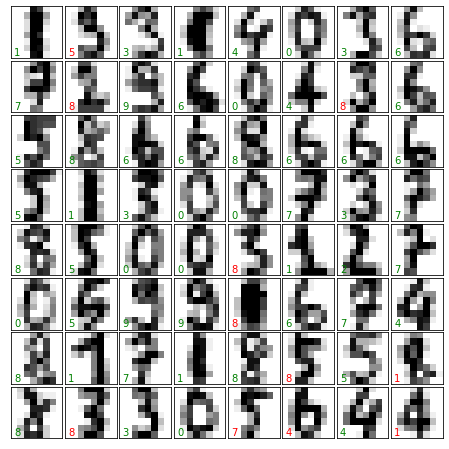

In [12]:
# Mostrar la predicción
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [13]:
# Verificar cuantas imágenes se identificaron correctamente
matches = (predicted == expected)
print(matches.sum())

389


In [14]:
# Número total de imágenes
print(len(matches))

450


In [15]:
# Proporción de imágenes identificadas correctamente
matches.sum() / float(len(matches))

0.8644444444444445

In [16]:
# Elaborar una matriz de confusión
from sklearn import metrics
print(metrics.confusion_matrix(expected, predicted))
plt.show()

[[43  0  0  0  0  0  0  1  0  0]
 [ 0 41  0  0  0  0  2  0  7  0]
 [ 0  1 25  1  0  0  0  0  7  0]
 [ 0  0  0 30  0  1  0  2  5  2]
 [ 1  2  0  0 34  0  0  6  0  0]
 [ 0  0  0  0  0 42  0  3  1  0]
 [ 0  0  0  0  1  2 48  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  2  0  0  0  1  0  2 33  0]
 [ 0  2  0  1  0  1  1  3  3 40]]


In [17]:
# Obtener el informe de clasificación
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.85      0.82      0.84        50
           2       1.00      0.74      0.85        34
           3       0.94      0.75      0.83        40
           4       0.97      0.79      0.87        43
           5       0.89      0.91      0.90        46
           6       0.94      0.94      0.94        51
           7       0.76      1.00      0.86        53
           8       0.59      0.87      0.70        38
           9       0.95      0.78      0.86        51

    accuracy                           0.86       450
   macro avg       0.89      0.86      0.86       450
weighted avg       0.89      0.86      0.87       450

